## Develop and Evaluate Machine Learning Model to Predict Big-Mart Future Sales
# vamshi

### Problem Statment
To find out what role certain properties of an item play and how they affect their sales by understanding Big Mart sales. In order to help Big-Mart achieve this goal, a predictive model can be built to find out for every store, the key factors that can increase their sales and what changes could be made to the product or store’s characteristics.

## Step 1 : Import library

In [1]:
import pandas as pd
import numpy as np

# for draw plot & graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#------------------------------------------------------------------------------
#library for label encoder:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
# ------------------------------------------------------------------------------
#from sklearn.linear_model import LinearRegression,DecisionTreeRegressor etc..
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Load & Data Inspect

In [2]:
data_path = "S:\master in data\Msc in data science\Big mart sales"
train = pd.read_csv(data_path+'/Train.csv')
test = pd.read_csv(data_path+'/Test.csv')

In [3]:
# understading Rows and Columns
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# Understading Raws and Columns
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
# print the total number of data 
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


### Dateset is given in train and test file but for better understnding and visualization we can merge the data into single file.

In [8]:
train['source']='train'
test['source']='test'

df=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [9]:
# Backup data
df1 = df.copy()

In [10]:
# check number of columns and rows
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [11]:
# inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


- we can seen some of column show missing data.
- some attribute is not in proper datatype so we can fix them later.

In [12]:
# statistical visualization of data
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002085D1F4DC8>,
      dtype=object)

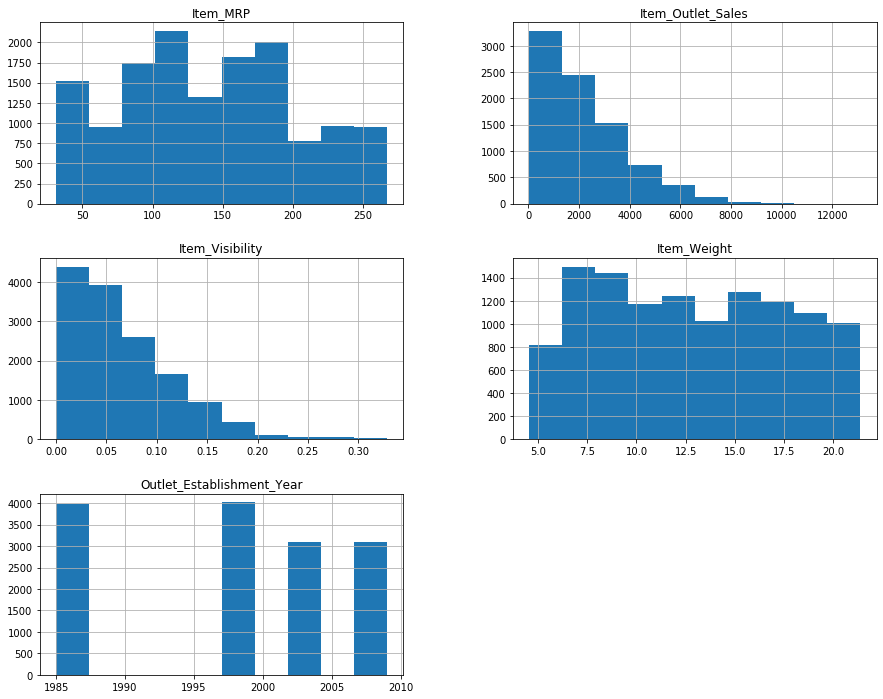

In [13]:
# we plot the numerical column to show the data
df.hist(figsize=(15,12))

## Step 2.1 Identification of missing values

In [14]:
# check missing value
df.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
source                          0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Item_Identifier                 0
Item_Fat_Content                0
dtype: int64

- We can seen Outlet_Size and Item_Weight show the missing value.
- Item_Outler_Sales also show some missing value but we can leave as it is because this is our target variable.

## Step 2.3 Treatment of missing values

### 1) Filling value of Outlet_Size.
- Outlet_Size depends on Oulet_Type and Outlet__Location_Type

In [15]:
table=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


- From above table we can assume that Grocery store was small size compared to other outlet. 
- SO we can map Grocery store with Outlet_Size Small

In [16]:
n={'Grocery Store':'Small'}
s=df.Outlet_Type.map(n)
df.Outlet_Size=df.Outlet_Size.combine_first(s)

In [17]:
df.Outlet_Size.isnull().sum()

3091

In [18]:
table=pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])
table

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,925


- table show that Outlet_Location_Type Tier 2 was small in size. 
- So we can map Tier 2 with Outlet_Size Small.

In [19]:
n={'Tier 2':'Small'}
s=df.Outlet_Location_Type.map(n)
df.Outlet_Size=df.Outlet_Size.combine_first(s)

In [20]:
df.Outlet_Size.isnull().sum()

0

### 2) Fill missing values for Item_weight  according to means of Item_Identifier


In [21]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [22]:
#check missing value
df.Item_Weight.isnull().sum()

0

In [23]:
#Determine average visibility of a product
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values: %d'%sum(missing_values))
df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after Modify: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values: 879
Number of 0 values after Modify: 0


## Step 3 : Modification & Elimination of variable

In [24]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


### Capturing first two characters from Item_Identifier and Create new Categories which is Item_Type_Combined

In [25]:
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])

#Renaming Item_Identifier categories into proper form.
df['Item_Type_Combined']=df['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [26]:
# create new column which combine Item type
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [27]:
#Renaming them to more intuitive categories.
df['Item_Type_Combined']=df['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

In [28]:
df['Item_Type_Combined']

0                  Food
1                Drinks
2                  Food
3                  Food
4        Non-Consumable
              ...      
14199              Food
14200              Food
14201    Non-Consumable
14202              Food
14203              Food
Name: Item_Type_Combined, Length: 14204, dtype: object

### Explore Categorical variable

In [29]:
#now we can Filter categorical variables and exclude Item_Identifier etc
categorical=[y for y in df.dtypes.index if df.dtypes[y]== 'object']
categorical=[y for y in categorical if y not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical:
    print("\nFrequency of categories for variable %s"%col)
    print(df[col].value_counts())


Frequency of categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of categories for variable Outlet_Size
Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int6

In [30]:
#Mark non-consumables as separate category in low_fat
df.loc[df['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       5998
Regular       4824
Non-Edible    2686
LF             367
reg            195
low fat        134
Name: Item_Fat_Content, dtype: int64

- We make a new category 'Non-Edible' from Item_Tpe_Combined and placed in Item_Fat_Content.

### Now we modifiy the Item_Fat_Content Categories into proper formet so we can understand esaily.

### Categories shown like :

- 'LF' rename as 'Low Fat'
- 'reg' rename as 'Regular'
- 'low fat' rename as Low Fat'

In [31]:
print('Original Categories :')
print(df['Item_Fat_Content'].value_counts())

print('\n Modified Categories :')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                          'reg':'Regular',
                                                          'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Original Categories :
Low Fat       5998
Regular       4824
Non-Edible    2686
LF             367
reg            195
low fat        134
Name: Item_Fat_Content, dtype: int64

 Modified Categories :


Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [32]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


### Find out total number of years old Outlet

In [33]:
# create new column with total number of years old Supermarket_Opening_Year
df['Outlet_Opening_Year']=2009-df['Outlet_Establishment_Year']
df['Outlet_Opening_Year']

0        10
1         0
2        10
3        11
4        22
         ..
14199    12
14200     0
14201     7
14202     2
14203     7
Name: Outlet_Opening_Year, Length: 14204, dtype: int64

### Before further data analysis we need to convert column type into their correct datatype

In [34]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')

df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')
df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null category
Item_Identifier              14204 non-null category
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null category
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null category
Outlet_Location_Type         14204 non-null category
Outlet_Size                  14204 non-null category
Outlet_Type                  14204 non-null category
source                       14204 non-null object
Item_Type_Combined           14204 non-null object
Outlet_Opening_Year          14204 non-null int64
dtypes: category(7), float64(4), int64(2), object(2)
memory usage: 1.0+ MB


## Step 3 : Exploratory Data Analysis

### Step 3.1 : Univariate analysis

In [35]:
# Outlet_Identifier Stores have varying sales
df.Outlet_Identifier.unique()

[OUT049, OUT018, OUT010, OUT013, OUT027, OUT045, OUT017, OUT046, OUT035, OUT019]
Categories (10, object): [OUT049, OUT018, OUT010, OUT013, ..., OUT017, OUT046, OUT035, OUT019]

In [36]:
df_OUT049 = df[df.Outlet_Identifier == 'OUT049']
df_OUT018 = df[df.Outlet_Identifier == 'OUT018']
df_OUT010 = df[df.Outlet_Identifier == 'OUT010']
df_OUT013 = df[df.Outlet_Identifier == 'OUT013']
df_OUT027 = df[df.Outlet_Identifier == 'OUT027']
df_OUT045 = df[df.Outlet_Identifier == 'OUT045']
df_OUT017 = df[df.Outlet_Identifier == 'OUT017']
df_OUT035 = df[df.Outlet_Identifier == 'OUT035']
df_OUT019 = df[df.Outlet_Identifier == 'OUT019']
df_OUT046 = df[df.Outlet_Identifier == 'OUT046']

## Correlation between item type and sales for a particular store

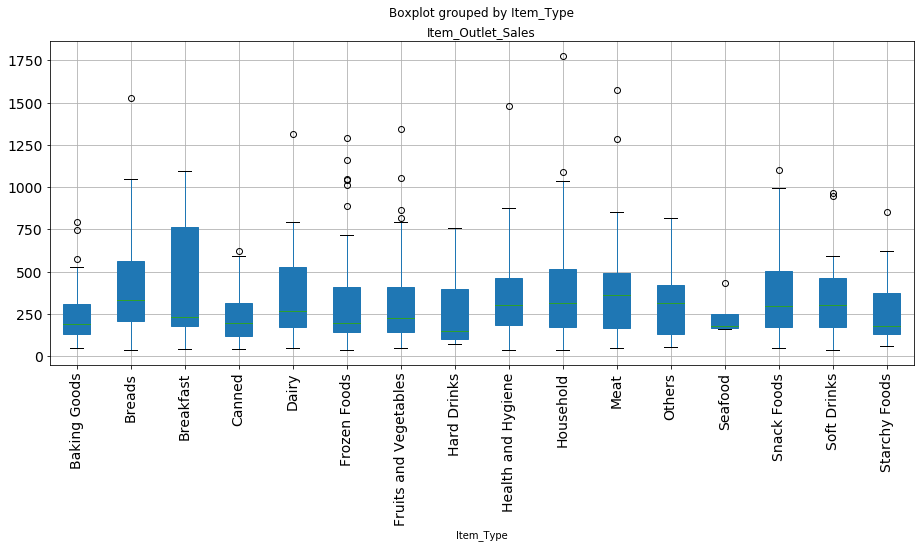

In [37]:
df_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);


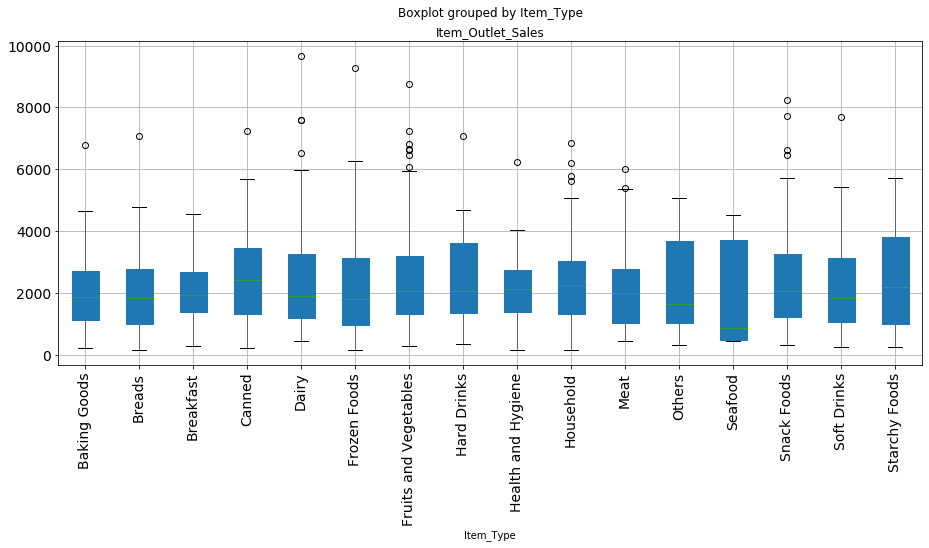

In [38]:
df_OUT017.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

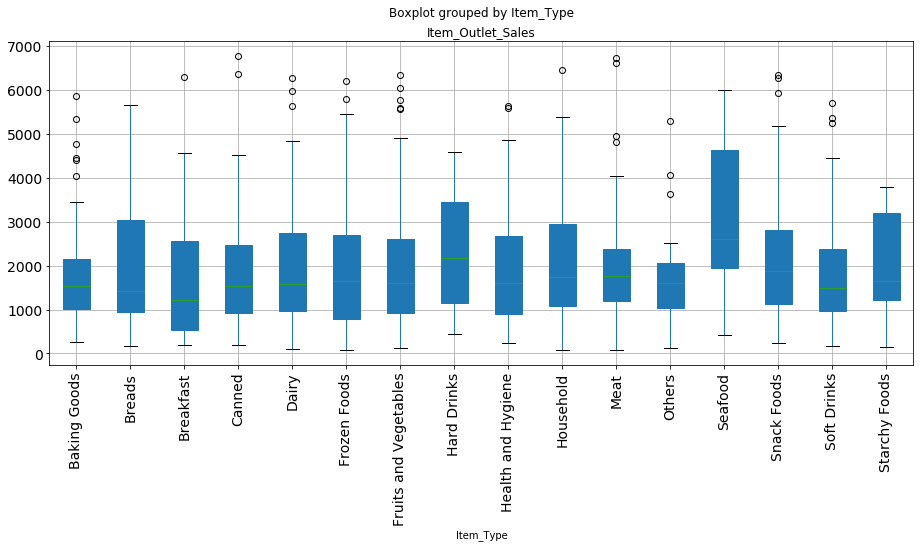

In [39]:
df_OUT018.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

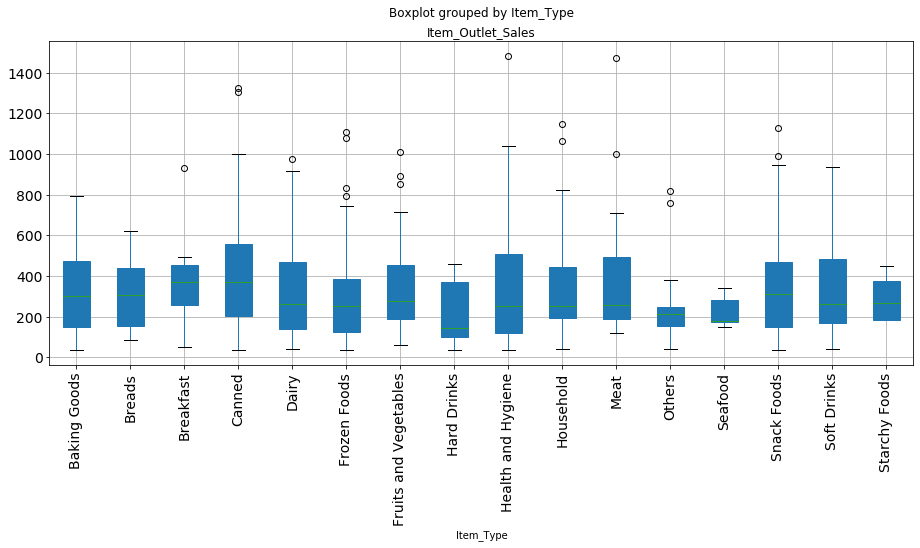

In [40]:
df_OUT019.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

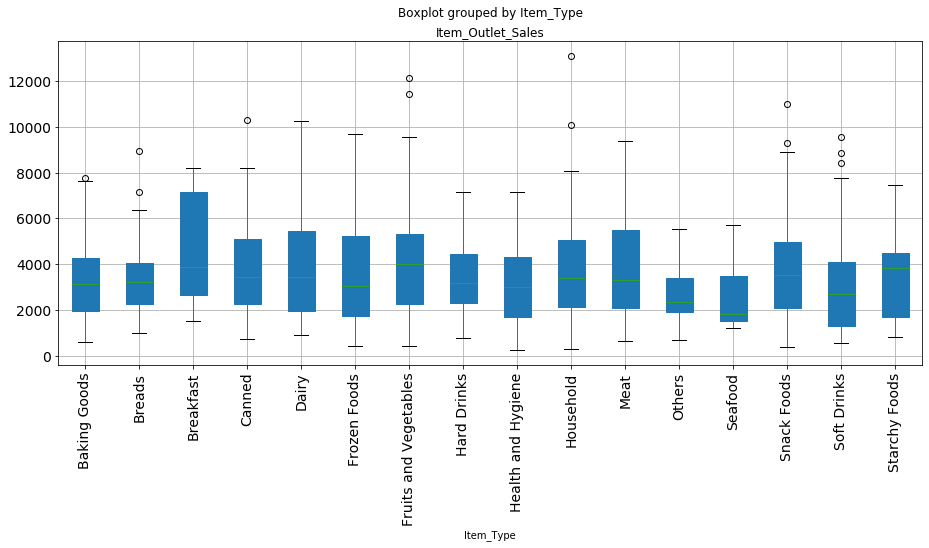

In [41]:
df_OUT027.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

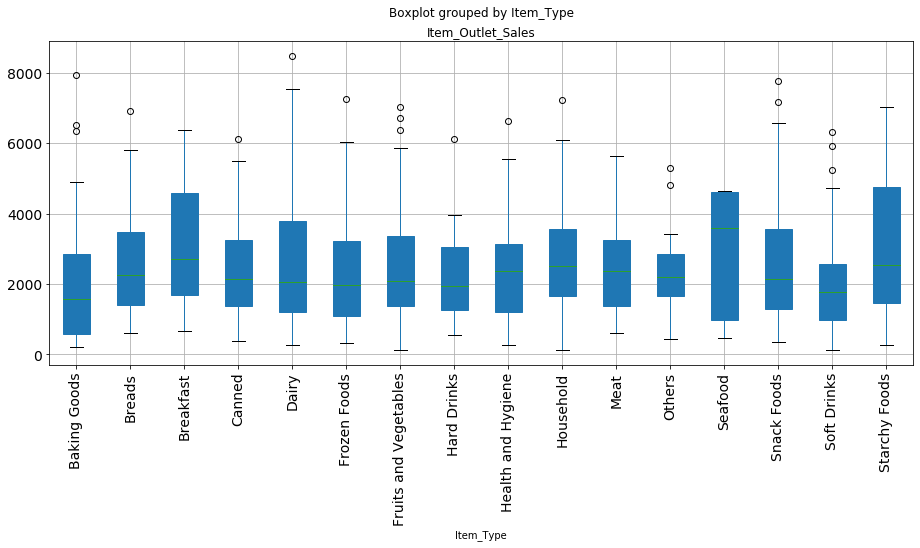

In [42]:
df_OUT035.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

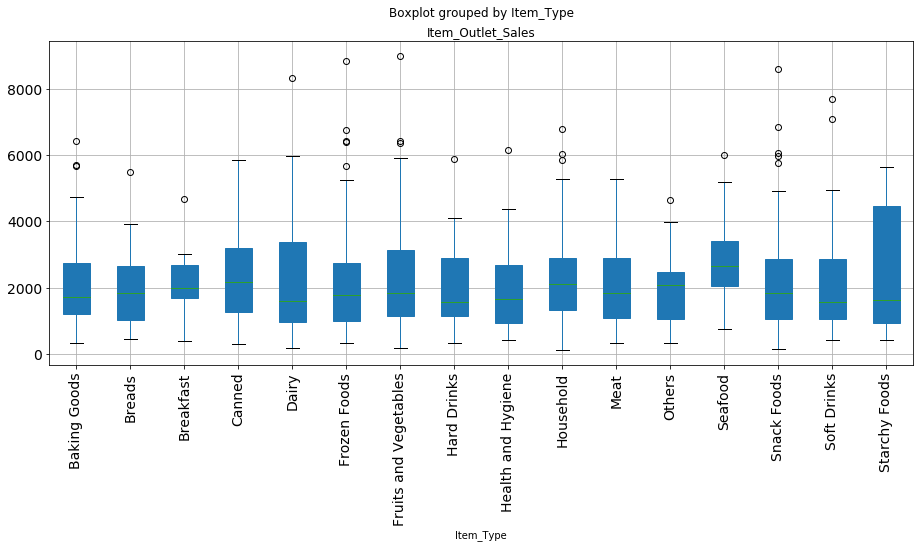

In [43]:
df_OUT045.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

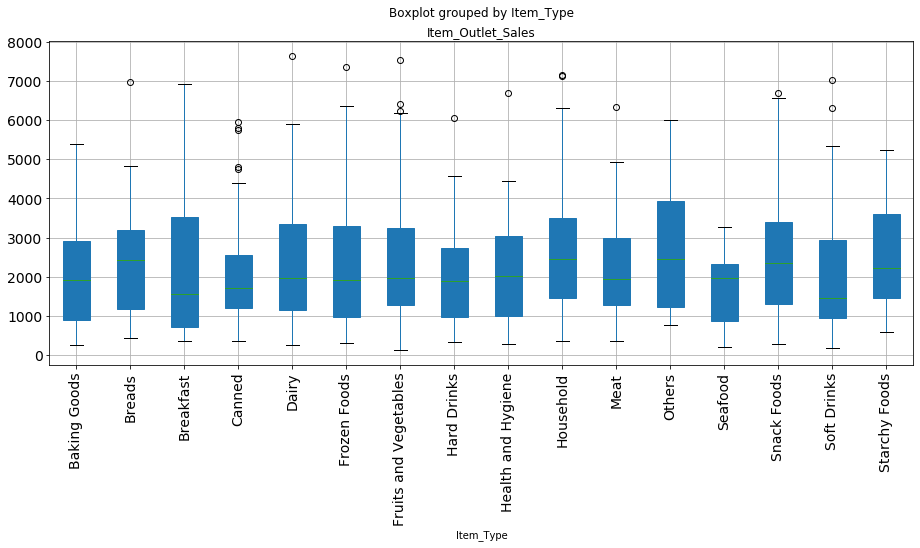

In [44]:
df_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type',grid='True',patch_artist=True,manage_ticks=True,fontsize=14,figsize=(15,6))
plt.xticks(rotation=90);

- All Boxplot show total number of item sales in various outlet.

## Analysis of item_visibility with item_outlet_sales

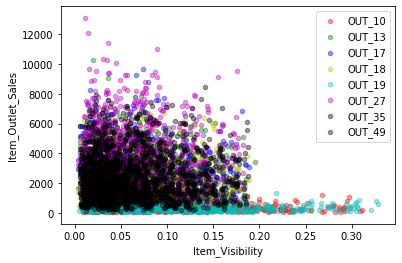

In [45]:
ax = df_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.4, label='OUT_10')
df_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.4, label='OUT_13')
df_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.4, label='OUT_17')
df_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.4, label='OUT_18')
df_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.4, label='OUT_19')
df_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.4, label='OUT_27')
df_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.4, label='OUT_35')
df_OUT049.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.4, label='OUT_49')

plt.legend(loc='best');

### Now we analysis ITEM_MRP column. 

- Correlation strength of this column with target column Item_Outlet_Sales is very high so we need can exploit this column for further infomation about target column

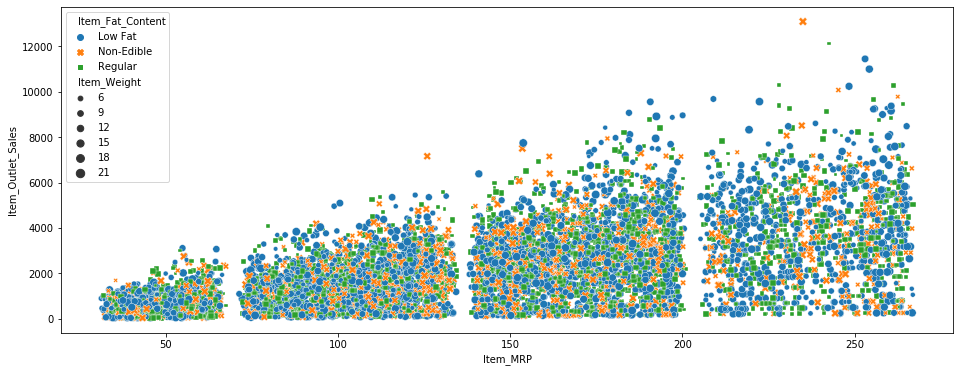

In [46]:
fig,axes=plt.subplots(1,1,figsize=(16,6))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df,style="Item_Fat_Content")

- ITEM_MRP variable contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing

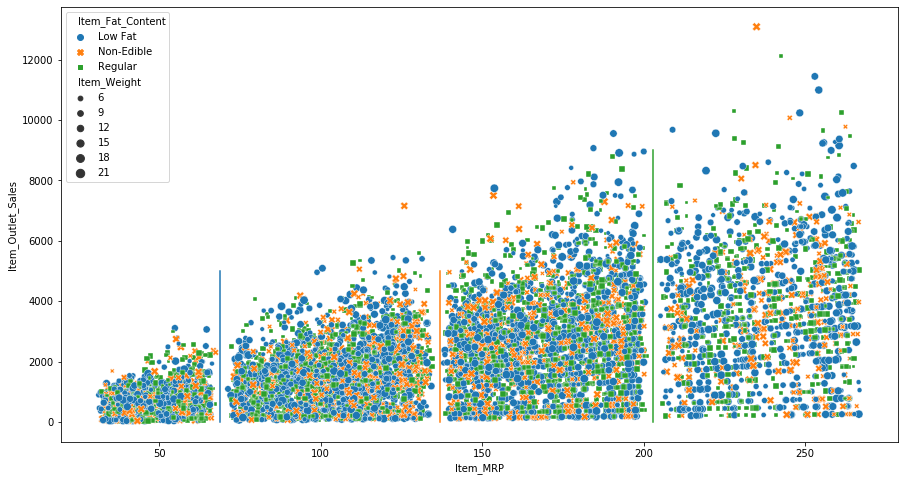

In [47]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df,style="Item_Fat_Content")
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

### Item_Outlet_Sales with every Item_Type

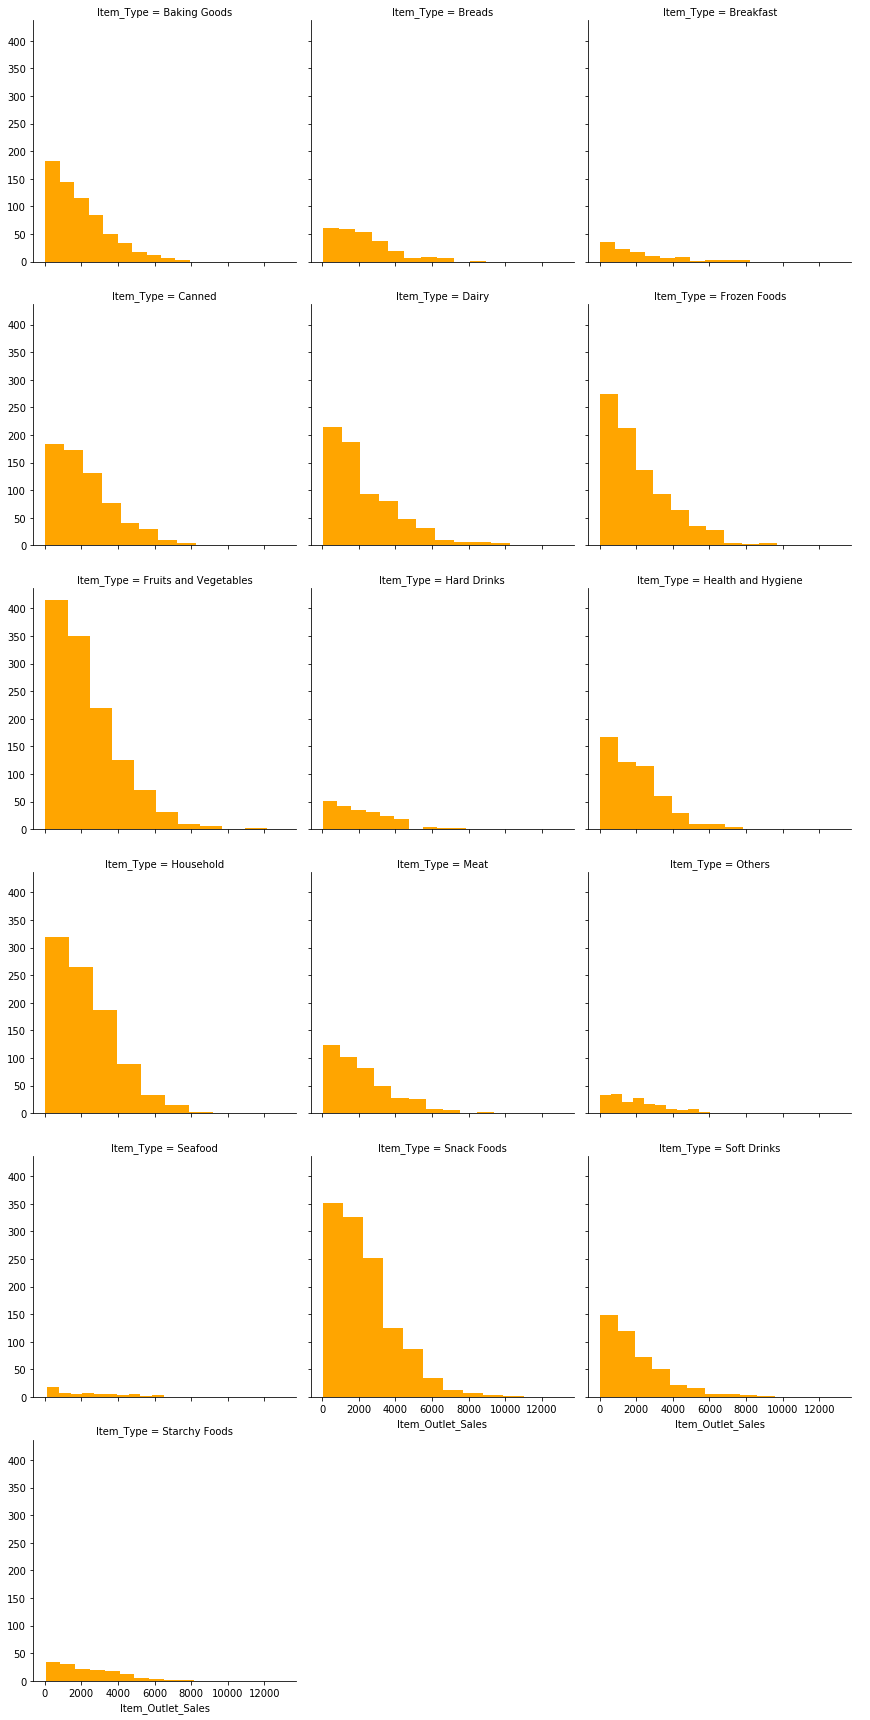

In [48]:
sns.FacetGrid(df, col='Item_Type', size=4, col_wrap=3,)\
              .map(plt.hist, 'Item_Outlet_Sales',color='orange') \
              .add_legend();

- we clearly seen that people are more intrested in healthy food & hygenic food, snack,household and vegitables product
- people avoid to buy stratchy food,sea food,soft drinks in most of outlet sales.

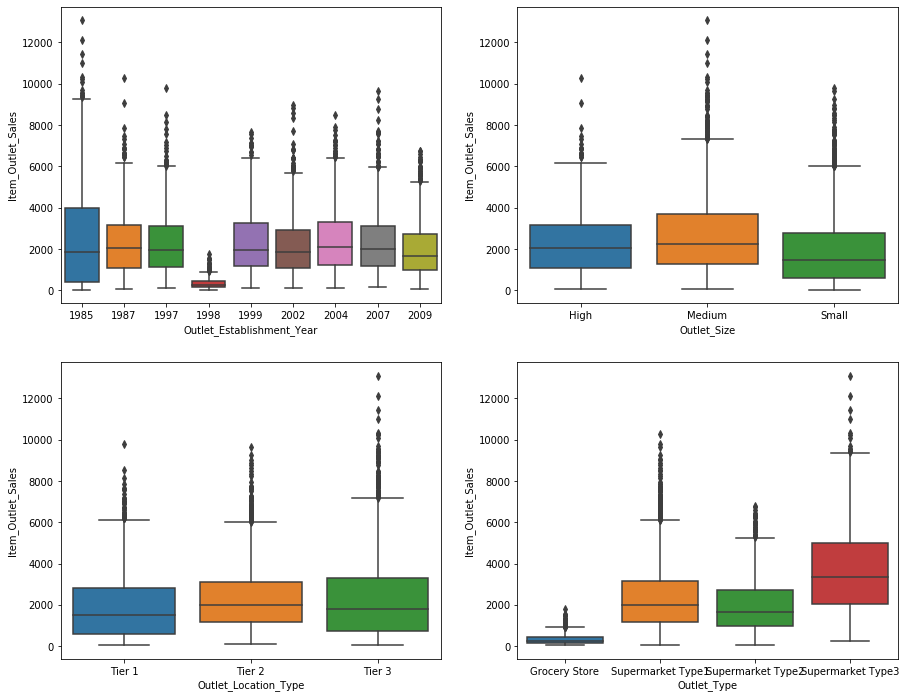

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

- Outlet establishment year 1998 show that lowest nnumber of item sales compare to rest of other years.
- From above plot we can seen that Grocery store is the lowest number of sales compared to other type store.

### Step 3.2 : Biivariate analysis

- Now we can perform Bivariate analysis with target variable Item_Outlet_Sales with different variable

### 1) Item_Outlet_Sales Based on Outlet_Identifier and Item_MRP

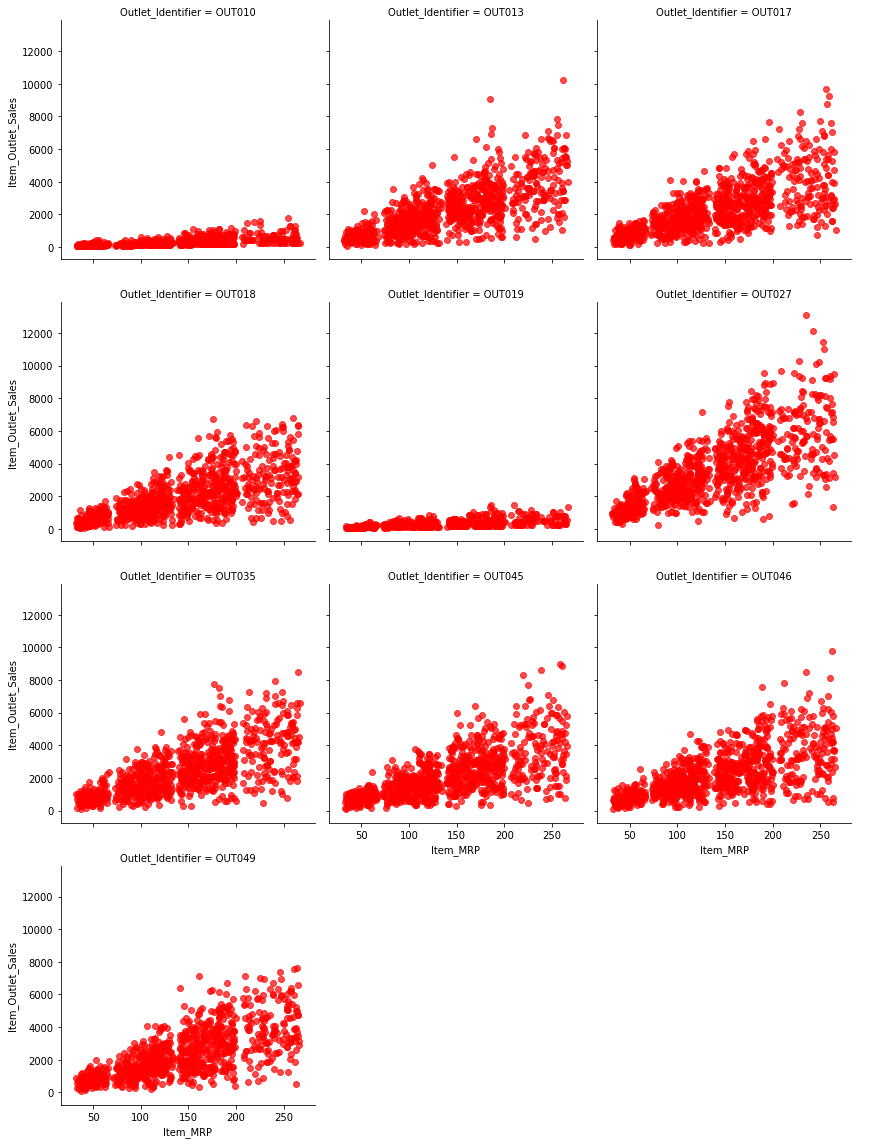

In [50]:
sns.FacetGrid(df, col='Outlet_Identifier', col_wrap=3, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales',color='Red',alpha=0.7) \
    .add_legend();

- only OUT10 and OUT19 show that it was lowest number of product sales and we can seen there is no any huge price product sold compared to other outlet.

### 2) Item_Outlet_Sales Based on Outlet_Identifier and Item_Weight

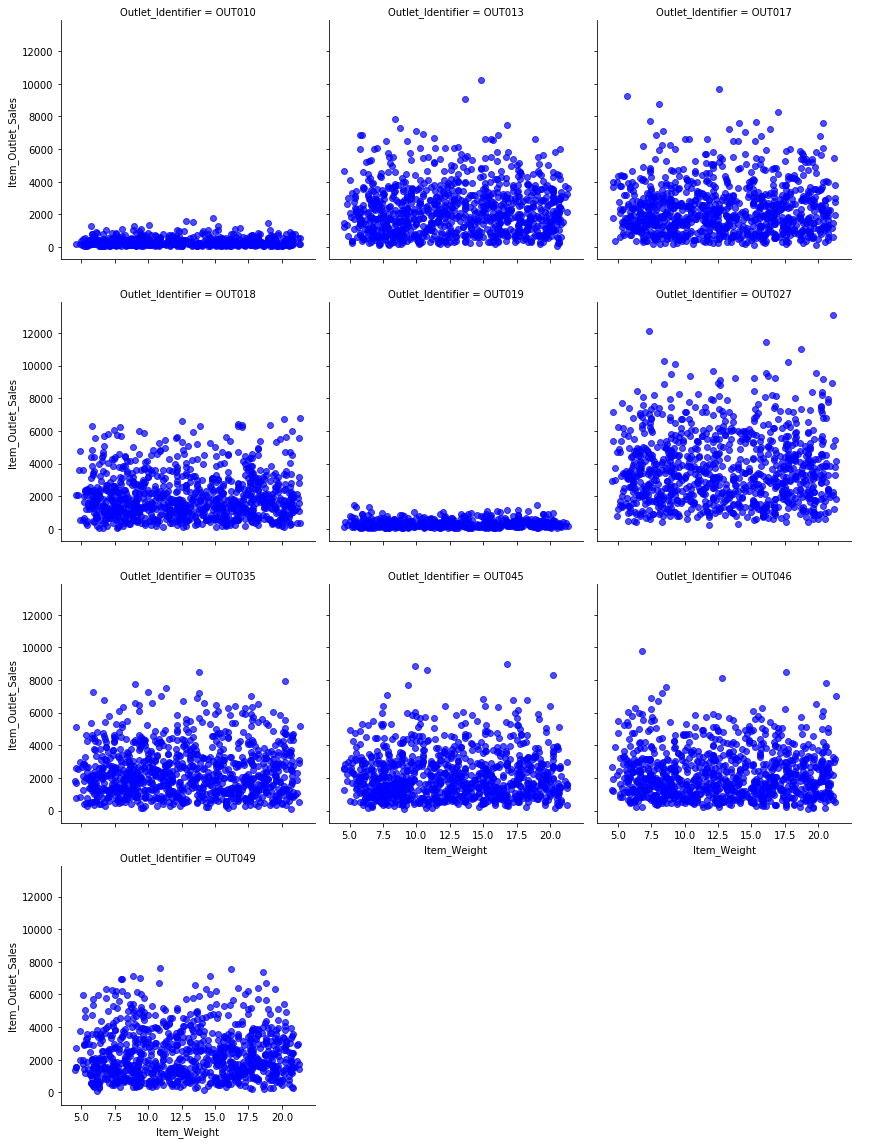

In [51]:
sns.FacetGrid(df, col='Outlet_Identifier', col_wrap=3, size=4) \
    .map(plt.scatter, 'Item_Weight', 'Item_Outlet_Sales',color='Blue',alpha=0.7) \
    .add_legend();

- All outlet sales very good number of product with item_weight is also show good in all outlet.
- OUT10 AND OUT19 also show that number of Item_weight is good but product sales is not good.

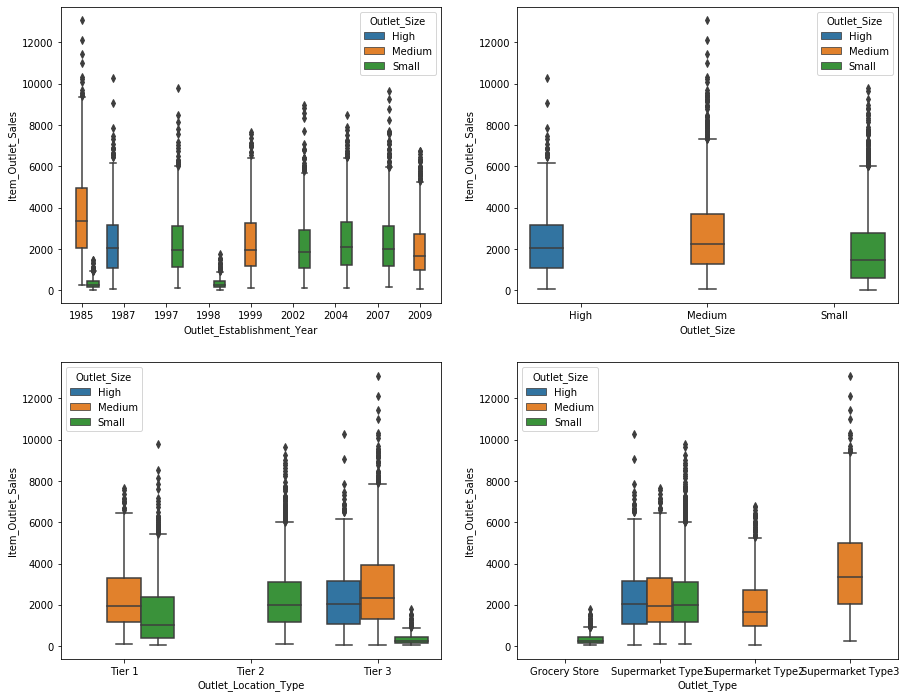

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

- Grocery store is small in size and supermarket store 1 and 3 has medium types of outlet

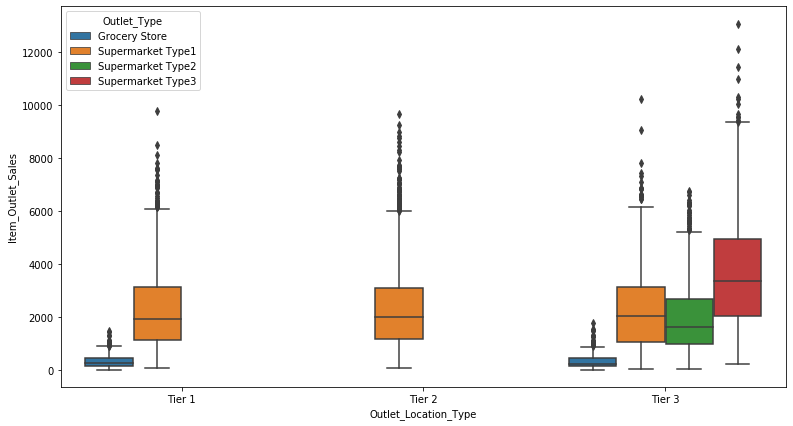

In [53]:
fig,axes=plt.subplots(1,1,figsize=(13,7))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=df)

- Tier 1 was only Grocery store and Supermarket type 1 outlet type where Tier 2 has only supermarket.
- location type Tier 3 has all types of outlet and most of the sales comes from Tier 3 compared rest.

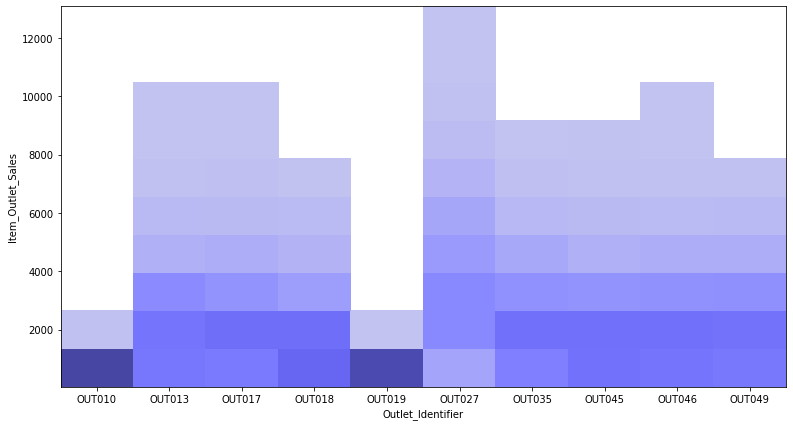

In [54]:
fig,axes=plt.subplots(1,1,figsize=(13,7))
sns.histplot(y='Item_Outlet_Sales',x='Outlet_Identifier',bins=10,data=df,color='Blue')

- as we seen plot OUT27 has the highest number of item sales among all outlet.

## step 3.3 : Transformation of categorical variables

- Before performing Encoding we have to seprate the categorical and numerical column from train & test data

In [55]:
# Saprate the data into Categorical columns and Numerical Columns for Train data
numerical_col = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_col))

categorical_col = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_col))

Number of Numerical features:  5
Number of Categorical features:  8


In [56]:
print(numerical_col)
print(categorical_col)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')


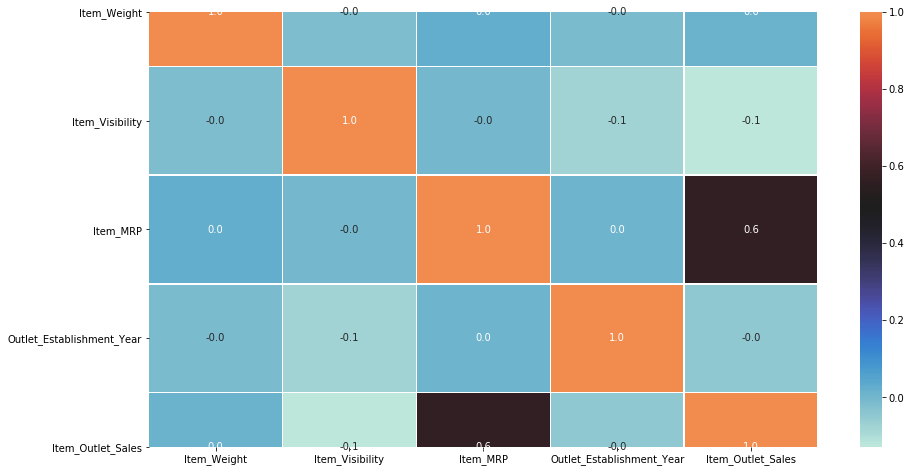

In [57]:
# Correlation matrix for train data
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(), annot = True,linewidths=.6, fmt='.1f', ax=ax,center=0.5)
plt.show()

- as we seen corelation metrix with all numeric column is good.

In [58]:
#Saprate the data into Categorical columns and Numerical Columns for Test Data

numerical_col = test.dtypes[test.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_col))

categorical_col = test.dtypes[test.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_col))

Number of Numerical features:  4
Number of Categorical features:  8


In [59]:
print(numerical_col)
print(categorical_col)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')


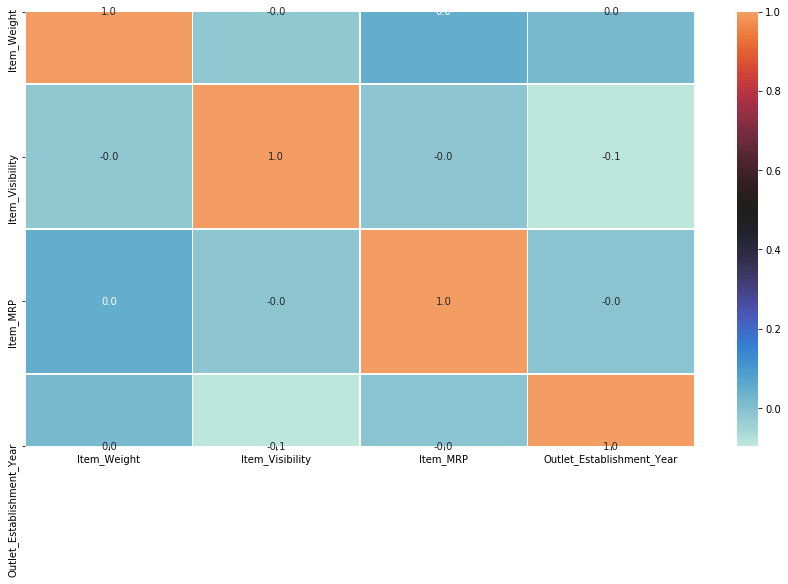

In [60]:
# Correlation matrix for test data
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(test.corr(), annot = True,linewidths=.6, fmt='.1f', ax=ax,center=0.5)
plt.show()

### We can use Label Encoding method to transform categorical column in to dummy value for dataset

- Firstly, note that we have both categorical and numeric features as predictors. we have to create **dummy variables** for categorical variables.

- Some Algorithm can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the model. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 


In [61]:
#New variable for outlet
df['Outlet'] = label_enc.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
label_enc = LabelEncoder()
for i in var_mod:
    df[i] = label_enc.fit_transform(df[i])

In [62]:
df = pd.get_dummies(df, columns=['Outlet_Location_Type','Item_Type_Combined','Outlet_Size','Item_Fat_Content','Outlet_Type','Outlet'])

In [63]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Opening_Year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,22,...,0,1,0,0,0,0,0,0,0,0


In [64]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [65]:
df.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Outlet_Identifier', 'source', 'Outlet_Opening_Year',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [66]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Opening_Year,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,train,11,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,train,22,0,0,...,0,1,0,0,0,0,0,0,0,0


## step 4 : Model Implementation

### step 4.1 : Spliting the original dataset into train & test

In [67]:
# Divide the data set back to train and test 
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [68]:
#Drop unnecessary columns: we can drop target variable 
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)


In [69]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Opening_Year,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,10,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,10,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,11,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,22,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [70]:
test.head()

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Opening_Year,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Type_Combined_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,107.8622,0.007565,20.750,OUT049,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,87.3198,0.038428,8.300,OUT017,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,241.7538,0.099575,14.600,OUT010,11,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,155.0340,0.015388,7.315,OUT017,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,234.2300,0.118599,13.600,OUT027,24,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
#define target and ID Columns for submission
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDCol]

## Step 4.2 : Now we are ready to apply ML algorithms

### 1) Decision Tree

In [72]:
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(train[predictors],train[target])

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [73]:
dec_tree_pred = tree.predict(train[predictors])

In [74]:
#performs cross validation
cv_score =cross_val_score(tree,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [75]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(sklearn.metrics.mean_squared_error(train[target].values,dec_tree_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
dec_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,dec_tree_pred)))


Model Report :
RMSE : 1060
CV Score : Mean - 1091 | Std - 44.23 | Min - 1004 | Max - 1174


In [76]:
dec_rsme

1060.0

In [77]:
acc = round(sklearn.metrics.r2_score(train[target], dec_tree_pred) * 100, 2)
decision_tree_Acc = round(acc,2)
print("Accuracy of model: ",round(acc,2,), "%")

Accuracy of model:  61.43 %


### 2) Linear Regression

In [78]:
predictors = [x for x in train.columns if x not in [target]+IDCol]

#print predictors
linear_alg= LinearRegression(normalize=True,copy_X=True, fit_intercept=True, n_jobs=1)

In [79]:
#fit the algorithm on the data
linear_alg.fit(train[predictors],train[target])

LinearRegression(n_jobs=1, normalize=True)

In [80]:
#predict training data set
linear_train_predictions = linear_alg.predict(train[predictors])

In [81]:
#performs cross validation
cv_score = cross_val_score(linear_alg,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [82]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,linear_train_predictions)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
linear_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,linear_train_predictions)))    


Model Report :
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.61 | Min - 1075 | Max - 1213


In [83]:
acc = round(metrics.r2_score(train[target], linear_train_predictions) * 100, 2)
linear_regression_Acc = round(acc,2)
print("Accuracy of model: ",round(acc,2,), "%")

Accuracy of model:  56.34 %


### 3) Random Forest Regression

In [84]:
rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=6,max_features='auto',min_samples_split=2)

In [85]:
rf.fit(train[predictors],train[target])

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=6)

In [86]:
random_pred = rf.predict(train[predictors])

In [87]:
#performs cross validation
cv_score =cross_val_score(rf,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [88]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,random_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
random_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,random_pred)))  


Model Report :
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.55 | Min - 1019 | Max - 1158


In [89]:
random_rsme

1068.0

In [90]:
acc = round(metrics.r2_score(train[target], random_pred) * 100, 2)
random_forest_Acc = round(acc,2)
print("Accuracy of model: ",round(acc,2,), "%")

Accuracy of model:  60.8 %


### 4) KNN

In [91]:
error = []
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(train[predictors],train[target])
    pred_i = knn.predict(train[predictors])
    error.append(np.mean(pred_i != train[target]))

Text(0, 0.5, 'Mean Error')

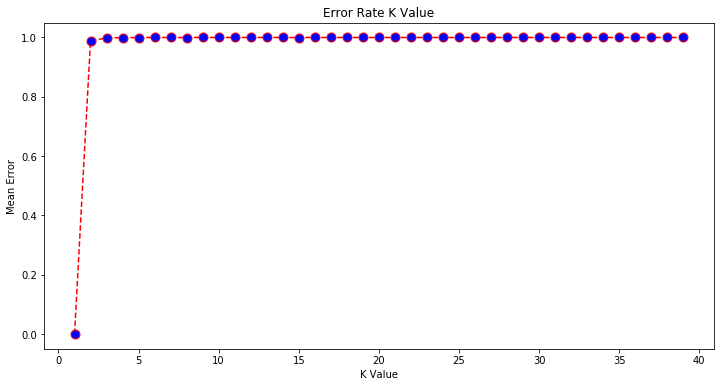

In [92]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='Red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=9)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

- We can choose k-value is approximate is 2 

In [93]:
knn = KNeighborsRegressor(n_neighbors = 2, metric = 'minkowski', p = 2,algorithm='auto', leaf_size=30,metric_params=None, n_jobs=1,weights='uniform')
knn.fit(train[predictors],train[target])

KNeighborsRegressor(n_jobs=1, n_neighbors=2)

In [94]:
#predict training data set
knn_predictions = knn.predict(train[predictors])

In [95]:
#performs cross validation
cv_score = cross_val_score(knn,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [96]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,knn_predictions)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
knn_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,knn_predictions)))    


Model Report :
RMSE : 780.9
CV Score : Mean - 1364 | Std - 72.36 | Min - 1238 | Max - 1496


In [97]:
acc = round(metrics.r2_score(train[target], knn_predictions) * 100, 2)
knn_Acc = round(acc,2)
print("Accuracy of model: ",round(acc,2,), "%")

Accuracy of model:  79.06 %


### 5) Linear Regression with AdaBoost

In [98]:
ada3=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
         learning_rate=0.4, loss='linear', n_estimators=50,
         random_state=None)
#fit the algorithm on the data
ada3.fit(train[predictors],train[target])

AdaBoostRegressor(base_estimator=LinearRegression(n_jobs=1, normalize=True),
                  learning_rate=0.4)

In [99]:
#predict training data set
ada_linear_train_predictions = ada3.predict(train[predictors])

In [100]:
cv_score = cross_val_score(ada3,train[predictors],train[target],cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [101]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,ada_linear_train_predictions)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
ada_linear_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,ada_linear_train_predictions)))    


Model Report :
RMSE : 1158
CV Score : Mean - 1159 | Std - 41.3 | Min - 1075 | Max - 1228


In [102]:
acc = round(metrics.r2_score(train[target], ada_linear_train_predictions) * 100, 2)
adaboost_linearreg_Acc = round(acc,2)
print("Accuracy of model: ",round(acc,2,), "%")

Accuracy of model:  53.92 %


### 5) GradientBoosting Regressor

In [103]:
#lin_grid_algo= LinearRegression(normalize=True)
boost1=GradientBoostingRegressor(learning_rate=0.9,max_depth=9,random_state=10,
                              n_estimators=500,min_samples_split=1000,min_samples_leaf=50,
                               max_leaf_nodes=7,max_features='sqrt')

In [104]:
boost1.fit(train[predictors],train[target])

GradientBoostingRegressor(learning_rate=0.9, max_depth=9, max_features='sqrt',
                          max_leaf_nodes=7, min_samples_leaf=50,
                          min_samples_split=1000, n_estimators=500,
                          random_state=10)

In [105]:
# lets see the important feature
coef3=pd.Series(boost1.feature_importances_,predictors)
coef3

Item_MRP                  0.468888
Item_Visibility           0.075430
Item_Weight               0.039360
Outlet_Opening_Year       0.103699
Outlet_Location_Type_0    0.006256
Outlet_Location_Type_1    0.000812
Outlet_Location_Type_2    0.013045
Item_Type_Combined_0      0.009340
Item_Type_Combined_1      0.002275
Item_Type_Combined_2      0.000453
Outlet_Size_0             0.001420
Outlet_Size_1             0.001142
Outlet_Size_2             0.010610
Item_Fat_Content_0        0.001652
Item_Fat_Content_1        0.001146
Item_Fat_Content_2        0.003354
Outlet_Type_0             0.077989
Outlet_Type_1             0.004065
Outlet_Type_2             0.001513
Outlet_Type_3             0.007327
Outlet_0                  0.002572
Outlet_1                  0.000723
Outlet_2                  0.002187
Outlet_3                  0.002788
Outlet_4                  0.002733
Outlet_5                  0.133013
Outlet_6                  0.018103
Outlet_7                  0.003217
Outlet_8            

In [106]:
grid_boost1_train_predictions = boost1.predict(train[predictors])

In [107]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,grid_boost1_train_predictions)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
g_boosting_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,grid_boost1_train_predictions)))  


Model Report :
RMSE : 890.8
CV Score : Mean - 1159 | Std - 41.3 | Min - 1075 | Max - 1228


In [108]:
acc = round(metrics.r2_score(train[target], grid_boost1_train_predictions) * 100, 2)
gradient_boost_Acc = round(acc,2)
print("Accuracy of model : ",round(acc,2,), "%")

Accuracy of model :  72.75 %


### 6) GridSearch Cross-Validation

In [109]:
param_test = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}

In [110]:
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)

In [111]:
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([1.19745612, 0.92884407, 1.01277623, 1.01796598, 0.97459345,
         1.55003619, 1.38793707, 1.41412082, 1.49367142, 1.1302979 ,
         1.47048535, 1.16427646, 1.48127961, 1.17107334, 1.21404691,
         1.96797752, 1.8160706 , 1.17746825, 1.25461998, 1.03955297,
         1.46628857, 1.09711704, 0.92762232, 0.96999788, 1.02236295,
         1.3167809 , 1.15168352, 1.01636758, 0.96739864, 1.18646154]),
  'std_fit_time': array([0.1435426 , 0.02988877, 0.17147648, 0.0737772 , 0.10374777,
         0.08929991, 0.17996389, 0.18197237, 0.18149252, 0.05159425,
         0.16446043, 0.02021507, 0.10003267, 0.07406873, 0.05387027,
         0.10557463, 0.18196724, 0.04927864, 0.04325686, 0.08977446,
         0.06206646, 0.07802197, 0.03263217, 0.05629527, 0.03343393,
         0.02690964, 0.01921824, 0.01797736, 0.08358337, 0.10337924]),
  'mean_score_time': array([0.04357376, 0.03197985, 0.0191875 , 0.03018174, 0.02818184,
         0.03677773, 0.02818217, 0.03198013, 0.

In [112]:
gridsearch_boost_train_predictions = gsearch2.predict(train[predictors])

In [113]:
#Print model report
print("\nModel Report :")
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,gridsearch_boost_train_predictions)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
gsearch_boosting_rsme=round(np.sqrt(metrics.mean_squared_error(train[target].values,gridsearch_boost_train_predictions)))  


Model Report :
RMSE : 1040
CV Score : Mean - 1159 | Std - 41.3 | Min - 1075 | Max - 1228


In [114]:
acc = round(metrics.r2_score(train[target], gridsearch_boost_train_predictions) * 100, 2)
grid_search_Acc = round(acc,2)
print("Accuracy of model : ",round(acc,2,), "%")

Accuracy of model :  62.83 %


### Step 4.3 : RMSE Comparision with all above model 

In [115]:
rmse_comp=[knn_rsme,g_boosting_rsme,gsearch_boosting_rsme,dec_rsme,random_rsme,linear_rsme,ada_linear_rsme]


col={'RMSE':rmse_comp}
models=['K-Nearest Neighbors','GradientBoosting Regressor','GridSearchCV','Decision Tree Regression','Random Forest Regression','Linear Regression','AdaBoost with Linear Regression']
rmse_data=pd.DataFrame(data=col,index=models)
rmse_data

,RMSE
K-Nearest Neighbors,781.0
GradientBoosting Regressor,891.0
GridSearchCV,1040.0
Decision Tree Regression,1060.0
Random Forest Regression,1068.0
Linear Regression,1127.0
AdaBoost with Linear Regression,1158.0


<Figure size 432x288 with 0 Axes>

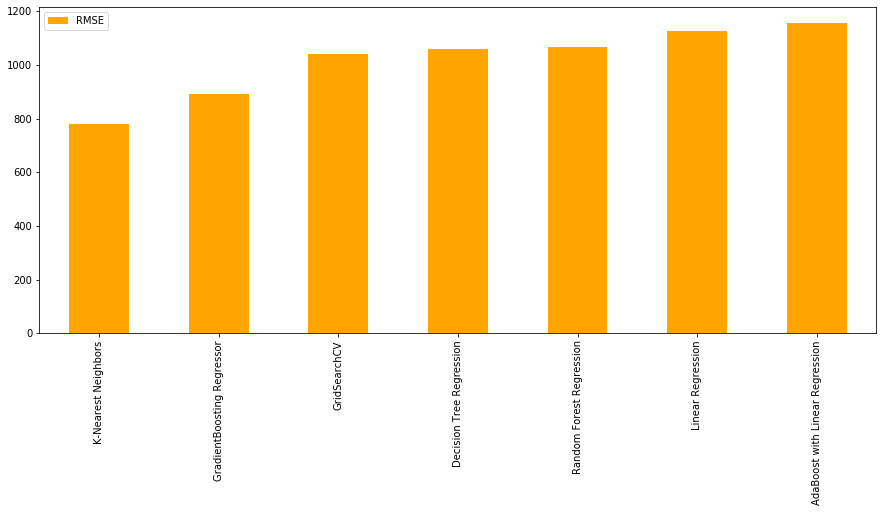

In [116]:
fig.tight_layout()
plt.savefig('output.png', dpi=200)
rmse_data.plot(kind='bar',color = 'orange',figsize=(15,6))

In [117]:
# rmse_data.to_csv(r"C:\Users\nikun\Downloads\Big mart sales\Bigmart RMSE.csv")

### Step 4.4 : Accuracy Comparision of all model

In [118]:
acc=[knn_Acc,gradient_boost_Acc,grid_search_Acc,decision_tree_Acc,random_forest_Acc,linear_regression_Acc,adaboost_linearreg_Acc]
col={'Accuracy':acc}
models=['K-Nearest Neighbors','GradientBoosting Regressor','GridSearchCV','Decision Tree Regression','Random Forest Regression','Linear Regression','AdaBoost with Linear Regression']
acc_data=pd.DataFrame(data=col,index=models)
acc_data

,Accuracy
K-Nearest Neighbors,79.06
GradientBoosting Regressor,72.75
GridSearchCV,62.83
Decision Tree Regression,61.43
Random Forest Regression,60.80
Linear Regression,56.34
AdaBoost with Linear Regression,53.92


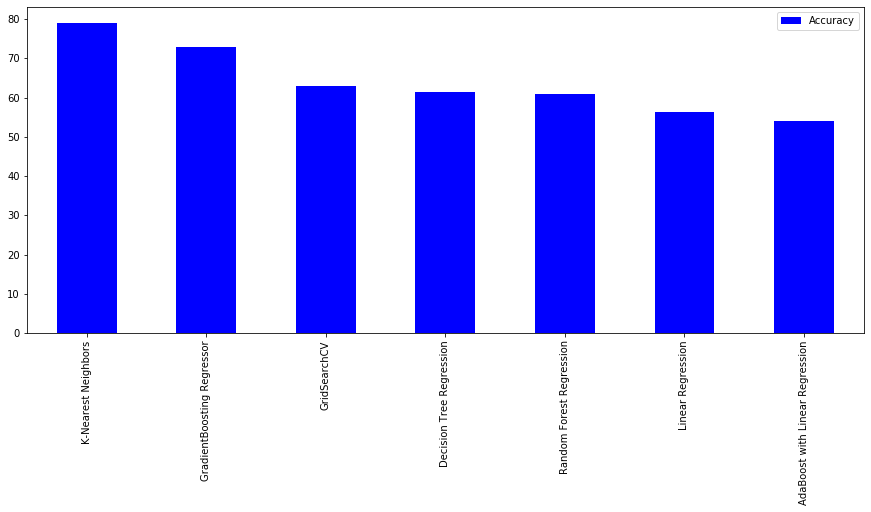

In [119]:
acc_data.plot(kind='bar',color = 'Blue',figsize=(15,6))

# Step 5 : Final Sales Prediction using Best Model which is KNN

In [120]:
best_model = pd.DataFrame({'Actual_Sales': train[target], 'Predicted_Sales': knn_predictions})  
best_model.head(10)

,Actual_Sales,Predicted_Sales
0,3735.1380,3494.7842
1,443.4228,757.6804
2,2097.2700,4239.4815
3,732.3800,725.7220
4,994.7052,879.5218
5,556.6088,404.8064
6,343.5528,621.1914
7,4022.7636,3493.4526
8,1076.5986,1165.8158
9,4710.5350,3768.4280


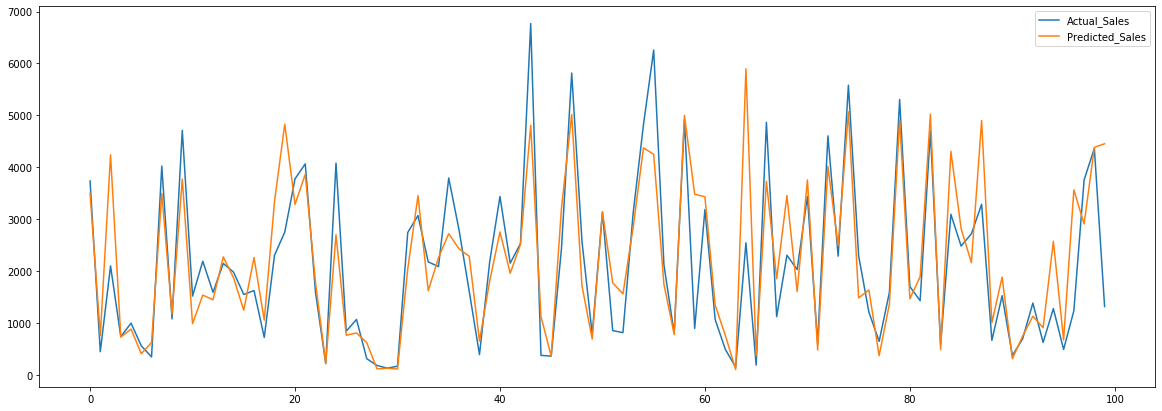

In [121]:
plt.figure(figsize=(20,7))
plt.plot(train[target][:100],label='Actual_Sales')
plt.plot(knn_predictions[:100],label='Predicted_Sales')
plt.legend()
plt.show()